# FCV Slide Deck 
XX.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to the Python path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

from src.utils import UCDP

# Set visualization style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Initialize UCDP processor
ucdp = UCDP()

print("✓ Setup complete: All required libraries imported and styles set")

✓ Setup complete: All required libraries imported and styles set


# Data Processing

In [2]:
raw_data = ucdp.fetch_ucdp_data()
df_conflicts = ucdp.process_conflict_data(raw_data)

# Verify data
print("\nFirst few rows of processed data:")
print(df_conflicts.head())
print("\nLast few rows:")
print(df_conflicts.tail())

1000 records fetched so far, fetching next page...
Retrieved all 1686 records
Total records fetched: 1686

Processed data summary:
Years covered: 1959-2023
Number of years: 65
Total conflicts: 1686

First few rows of processed data:
type_of_conflict  Extra-systemic conflicts  Inter-state conflicts  \
year                                                                
1959                                     0                      0   
1960                                     0                      0   
1961                                     1                      1   
1962                                     2                      2   
1963                                     2                      2   

type_of_conflict  Internal conflicts  Internationalized-internal conflicts  
year                                                                        
1959                               1                                     0  
1960                               4                

# Figure 1: Number of Armed Conflicts by Type
This visualization shows the evolution of different types of conflicts over time:
- Extra-systemic conflicts: Between a state and a non-state group outside its territory
- Inter-state conflicts: Between states
- Internal conflicts: Between a government and rebel groups
- Internationalized internal conflicts: Internal conflicts with foreign government involvement

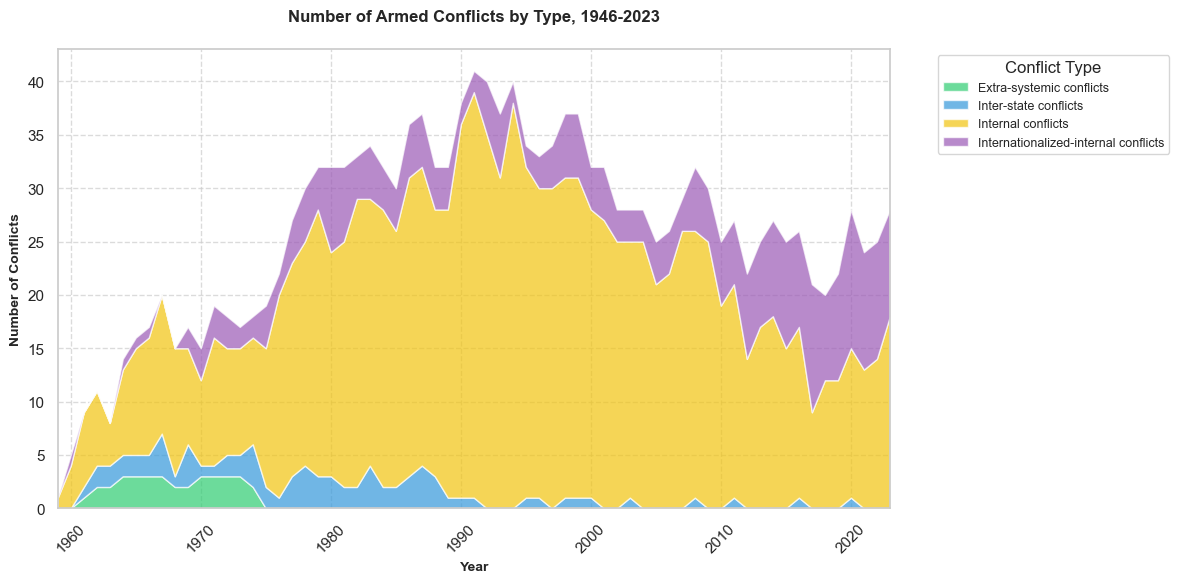


Data Summary:
Time period: 1959-2023
Total conflicts: 1686

Conflicts by type:
Extra-systemic conflicts: 35
Inter-state conflicts: 81
Internal conflicts: 1273
Internationalized-internal conflicts: 297


In [6]:
def create_conflict_plot(df, save_fig=False):
    """Create stacked area plot showing evolution of conflict types"""
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get colors for each conflict type
    colors = [UCDP.get_conflict_colors()[col] for col in df.columns]
    
    # Create stacked area plot
    ax.stackplot(df.index, 
                [df[col] for col in df.columns],
                labels=df.columns,
                colors=colors,
                alpha=0.7)
    
    # Customize plot
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Conflicts', fontsize=10, fontweight='bold')
    ax.set_title('Number of Armed Conflicts by Type, 1946-2023',
                fontsize=12, pad=20, fontweight='bold')
    
    # Set x-axis range
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Add legend
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=9,
        title='Conflict Type',
        frameon=True
    )
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('conflict_evolution.png',
                    dpi=300,
                    bbox_inches='tight')
    
    return fig

# Create and display visualization
fig = create_conflict_plot(df_conflicts)
plt.show()

# Print summary statistics
print("\nData Summary:")
print(f"Time period: {df_conflicts.index.min()}-{df_conflicts.index.max()}")
print(f"Total conflicts: {df_conflicts.sum().sum():.0f}")
print("\nConflicts by type:")
for col in df_conflicts.columns:
    print(f"{col}: {df_conflicts[col].sum():.0f}")

# Figure 1 - Global Active Conflicts
Create a line plot showing the trend in active conflicts over time.

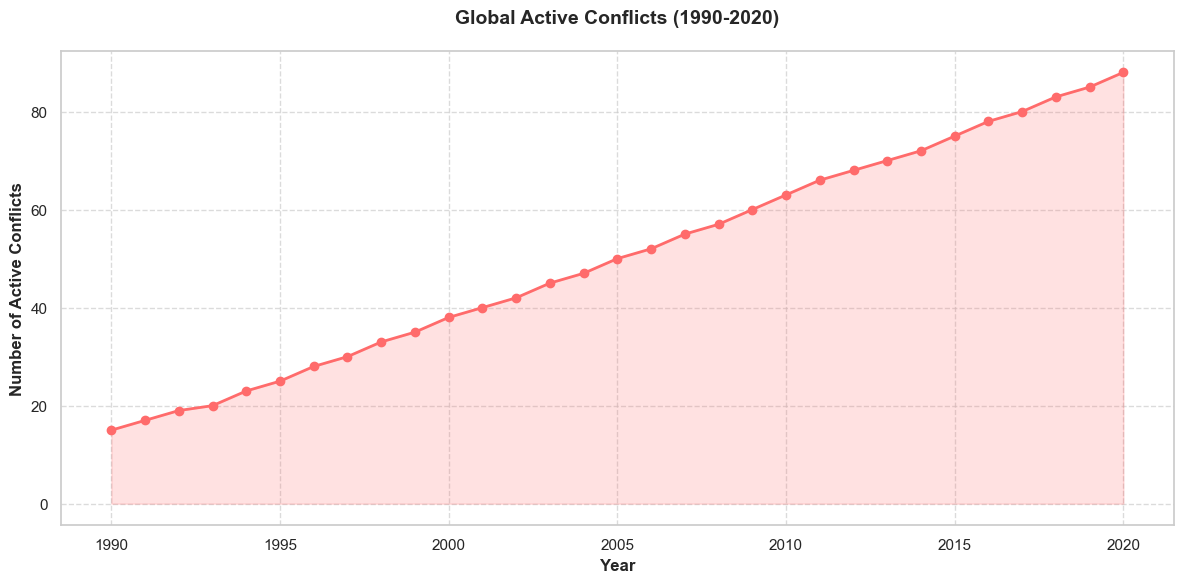

✓ Figure 1 generated successfully


In [3]:
# Create a line plot showing the trend in active conflicts over time
def create_conflicts_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create main plot
    ax.plot(years, conflicts, marker='o', linestyle='-', color='#FF6B6B', 
            linewidth=2, markersize=6)
    ax.fill_between(years, conflicts, alpha=0.2, color='#FF6B6B')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Number of Active Conflicts", fontsize=12, fontweight='bold')
    ax.set_title("Global Active Conflicts (1990-2020)", 
                fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig1 = create_conflicts_plot()
plt.show()

print("✓ Figure 1 generated successfully")

# Figure 2 - Conflict-Induced Fatalities
Create a bar chart representing estimated fatalities due to conflict.

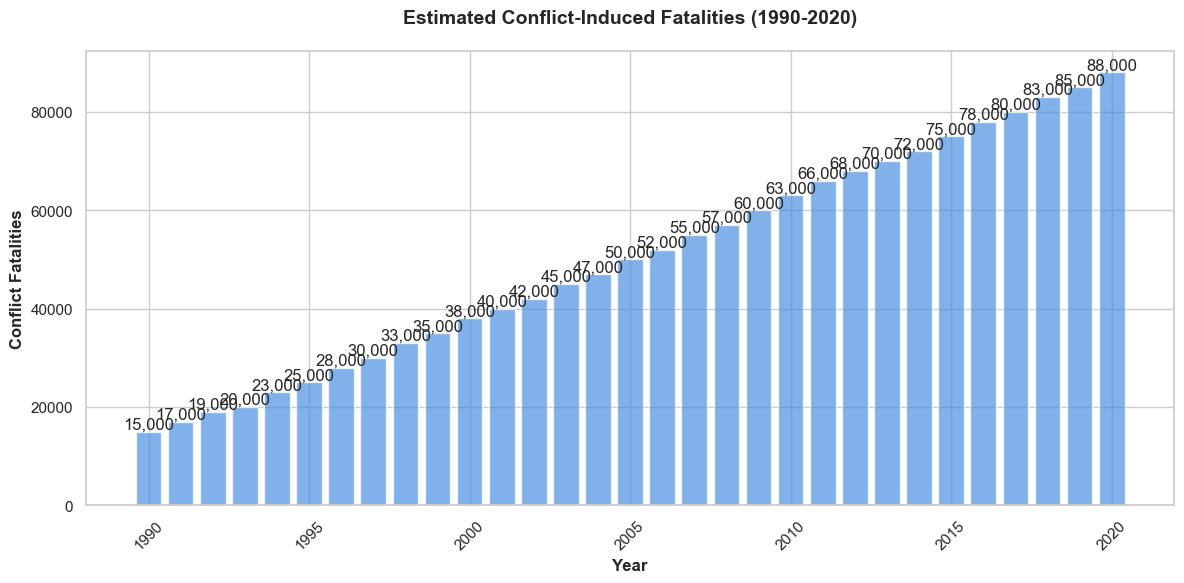

✓ Figure 2 generated successfully


In [4]:
# Create a bar chart representing estimated fatalities due to conflict
def create_fatalities_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    fatalities = [x * 1000 for x in conflicts]
    
    # Create bar chart
    bars = ax.bar(years, fatalities, color='#4A90E2', alpha=0.7)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Conflict Fatalities", fontsize=12, fontweight='bold')
    ax.set_title("Estimated Conflict-Induced Fatalities (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig2 = create_fatalities_plot()
plt.show()

print("✓ Figure 2 generated successfully")

# Figure 3 - Global Coup Attempts
Create a line plot tracking coup attempts globally.

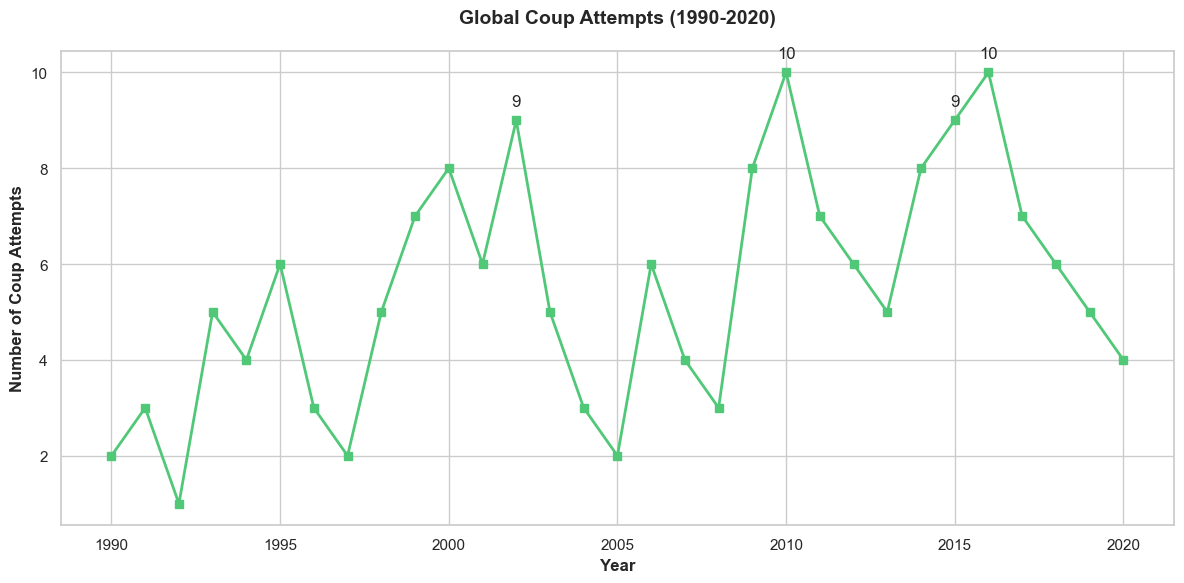

✓ Figure 3 generated successfully


In [5]:
# Create a line plot tracking coup attempts globally
def create_coups_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    coups = [2, 3, 1, 5, 4, 6, 3, 2, 5, 7, 8, 6, 9, 5, 3, 2, 6, 4, 
             3, 8, 10, 7, 6, 5, 8, 9, 10, 7, 6, 5, 4]
    
    # Create line plot
    ax.plot(years, coups, marker='s', linestyle='-', color='#50C878',
            linewidth=2, markersize=6)
    
    # Add annotations
    for i, coup in enumerate(coups):
        if coup > 8:
            ax.annotate(f'{coup}', 
                       (years[i], coups[i]),
                       xytext=(0, 10),
                       textcoords='offset points',
                       ha='center')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Number of Coup Attempts", fontsize=12, fontweight='bold')
    ax.set_title("Global Coup Attempts (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig3 = create_coups_plot()
plt.show()

print("✓ Figure 3 generated successfully")

# Figure 4 - Forcibly Displaced Persons
Create an area plot showing trends in global displacement.

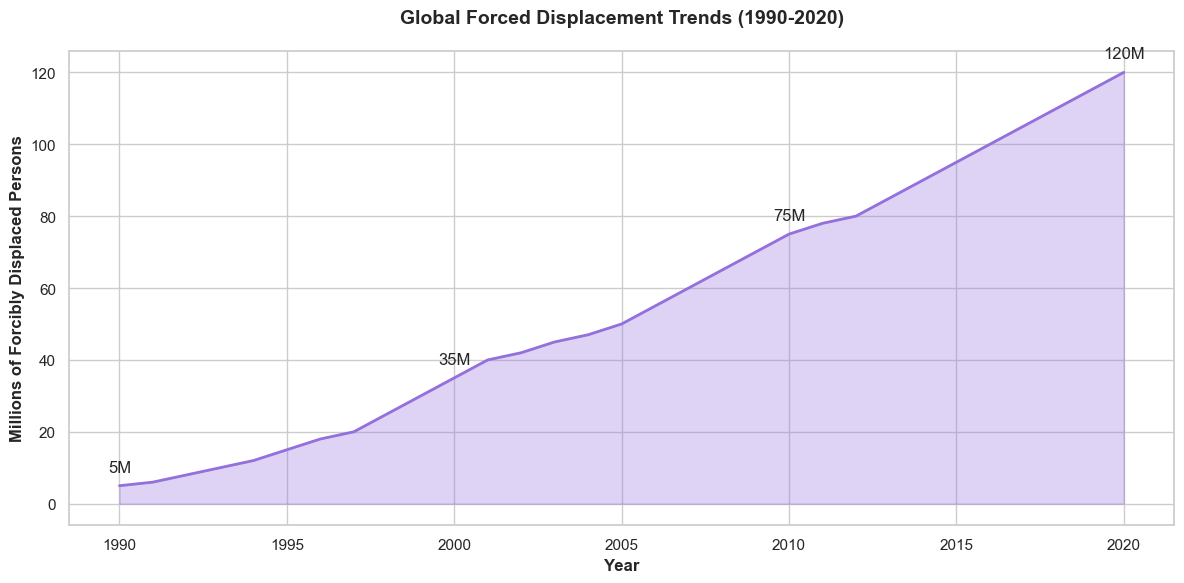

✓ Figure 4 generated successfully


In [6]:
# Create an area plot showing trends in global displacement
def create_displacement_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    displaced = [5, 6, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40, 42, 
                45, 47, 50, 55, 60, 65, 70, 75, 78, 80, 85, 90, 95, 
                100, 105, 110, 115, 120]
    
    # Create area plot
    ax.fill_between(years, displaced, color='#9370DB', alpha=0.3)
    ax.plot(years, displaced, color='#9370DB', linewidth=2)
    
    # Add milestone annotations
    significant_years = [1990, 2000, 2010, 2020]
    for year in significant_years:
        idx = years.index(year)
        ax.annotate(f'{displaced[idx]}M',
                    (year, displaced[idx]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Millions of Forcibly Displaced Persons", 
                 fontsize=12, fontweight='bold')
    ax.set_title("Global Forced Displacement Trends (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig4 = create_displacement_plot()
plt.show()

print("✓ Figure 4 generated successfully")

# Figure 5 - Fragility Score Trends
Create a scatter plot with connecting lines showing changes in fragility scores based on OECD metrics.

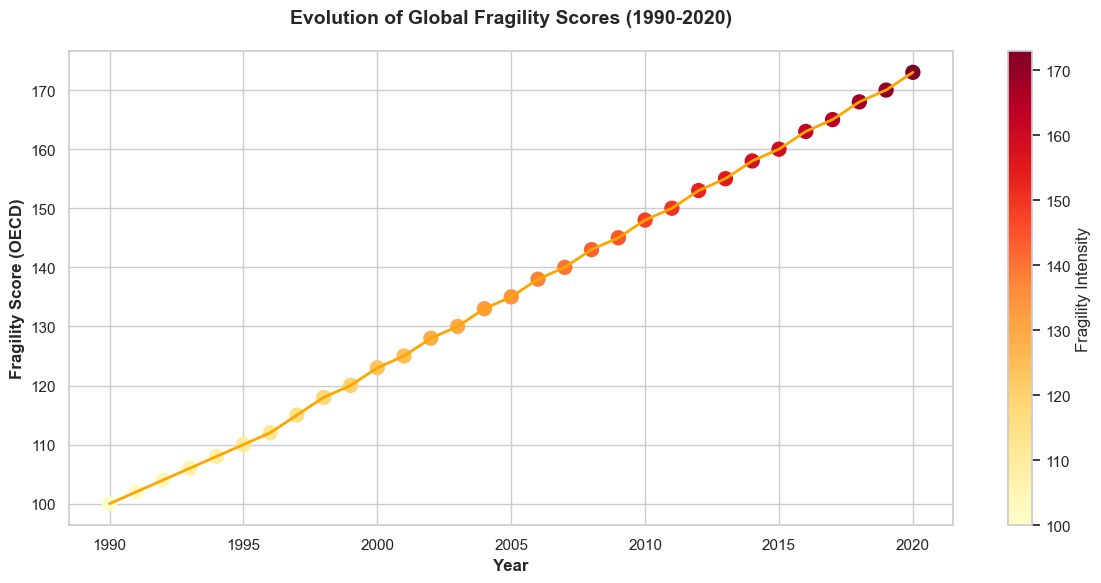

✓ Figure 5 generated successfully


In [7]:
# Create a scatter plot with connecting lines showing changes in fragility scores based on OECD metrics
def create_fragility_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    fragility = [100, 102, 104, 106, 108, 110, 112, 115, 118, 120, 
                123, 125, 128, 130, 133, 135, 138, 140, 143, 145, 
                148, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173]
    
    # Create scatter plot with gradient
    points = ax.scatter(years, fragility, c=fragility, 
                       cmap='YlOrRd', s=100)
    ax.plot(years, fragility, color='#FFA500', linewidth=2)
    
    # Add colorbar
    plt.colorbar(points, label='Fragility Intensity')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Fragility Score (OECD)", fontsize=12, fontweight='bold')
    ax.set_title("Evolution of Global Fragility Scores (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig5 = create_fragility_plot()
plt.show()

print("✓ Figure 5 generated successfully")